In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

In [2]:
veri = pd.read_csv("titanic.csv")
veri

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
veri = veri.drop("PassengerId",axis=1)
veri.isnull().sum()/veri.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [5]:
veri = veri.drop(columns="Cabin")
veri.isnull().sum()/veri.shape[0] * 100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [6]:
veri.Age = veri.Age.fillna(veri.Age.mean())
veri.Embarked = veri.Embarked.fillna(veri.Embarked.mode()[0])
veri.isnull().sum()/veri.shape[0] * 100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [7]:
veri["Title"] = veri.Name.str.split(".").str.get(0)
veri.Title = veri.Title.str.split(",").str.get(1)
veri.Title = veri.Title.str.strip()

In [8]:
ftitle=["Don","Dona","Mme","Ms","Mra","Mlle"]
etitle=["Mr","Mrs","Mrs","Mrs","Mrs","Miss"]

for i in range(len(ftitle)):
    for j in range(len(etitle)):
        if i == j:
            veri.Title = veri.Title.str.replace(ftitle[i],etitle[j])

veri.groupby("Title").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Title,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2
Dr,7,7,7,7,7,7,7,7,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,40,40,40,40,40
Miss,184,184,184,184,184,184,184,184,184,184
Mr,518,518,518,518,518,518,518,518,518,518


In [9]:
veri.Title = veri.Title.apply(lambda x:x if x in ["Mr","Miss","Mrs","Master"] else "Others")
veri.groupby("Title").count()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Title,,,,,,,,,,
Master,40,40,40,40,40,40,40,40,40,40
Miss,184,184,184,184,184,184,184,184,184,184
Mr,518,518,518,518,518,518,518,518,518,518
Mrs,127,127,127,127,127,127,127,127,127,127
Others,22,22,22,22,22,22,22,22,22,22


In [10]:
veri = veri.drop(columns=["Name","Ticket"],axis=1)
veri

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr
1,1,1,female,38.000000,1,0,71.2833,C,Mrs
2,1,3,female,26.000000,0,0,7.9250,S,Miss
3,1,1,female,35.000000,1,0,53.1000,S,Mrs
4,0,3,male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Others
887,1,1,female,19.000000,0,0,30.0000,S,Miss
888,0,3,female,29.699118,1,2,23.4500,S,Miss
889,1,1,male,26.000000,0,0,30.0000,C,Mr


In [11]:
kat = ["Pclass","Sex","Embarked","Title"]
le = LabelEncoder()

for i in kat:
    le.fit(veri[i])
    veri[i] = le.transform(veri[i])

In [12]:
y = veri.Survived
x = veri.drop("Survived",axis=1)

sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1, random_state=0)

In [16]:
model = Sequential()
model.add(Dense(64,input_dim=x_train.shape[1],activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
m1 = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,verbose=0)

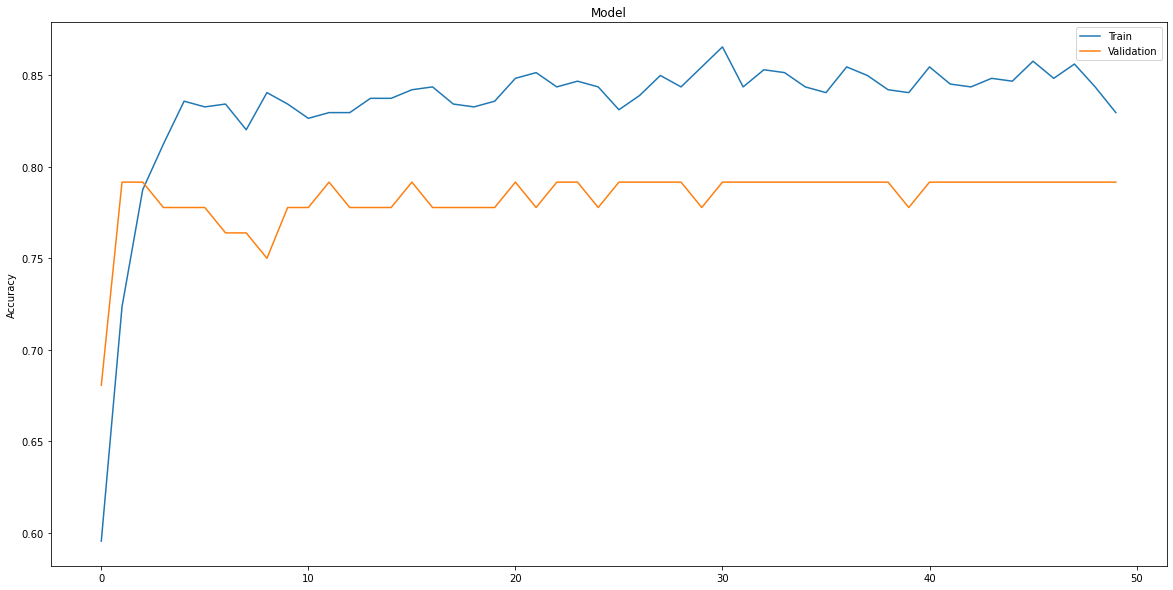

In [18]:
plt.figure(figsize=(20,10))
plt.plot(m1.history["accuracy"])
plt.plot(m1.history["val_accuracy"])
plt.title("Model")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc="upper right");

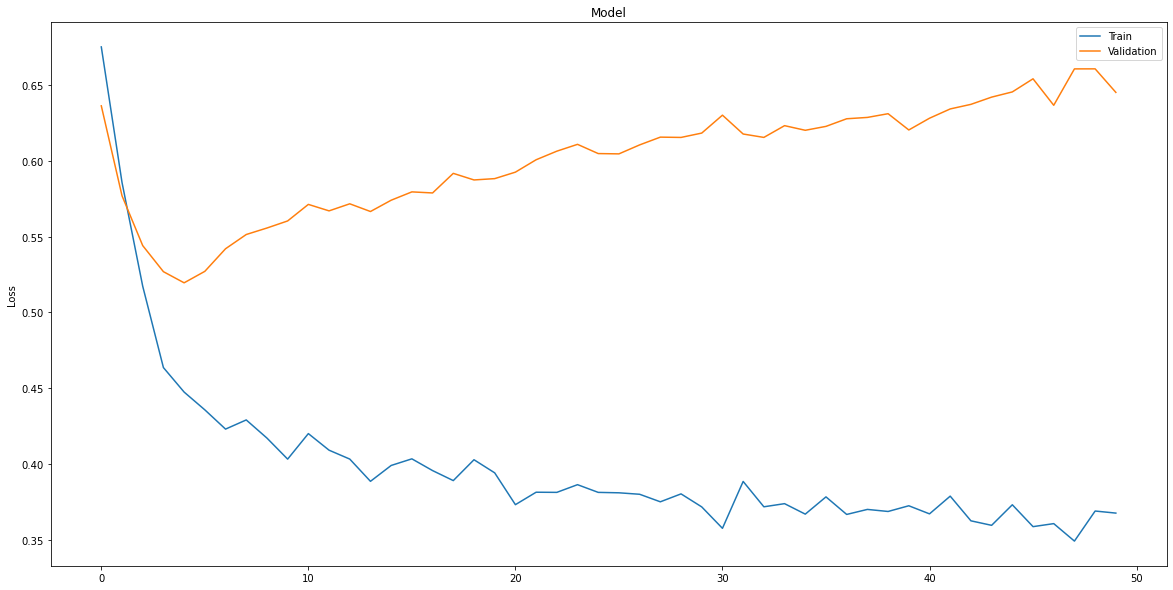

In [20]:
plt.figure(figsize=(20,10))
plt.plot(m1.history["loss"])
plt.plot(m1.history["val_loss"])
plt.title("Model")
plt.ylabel("Loss")
plt.legend(["Train","Validation"],loc="upper right");